In [11]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score


In [13]:
ads_data = pd.read_csv("/content/advertising.csv")
ads_data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [14]:
ads_data.shape
ads_data.info()
ads_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


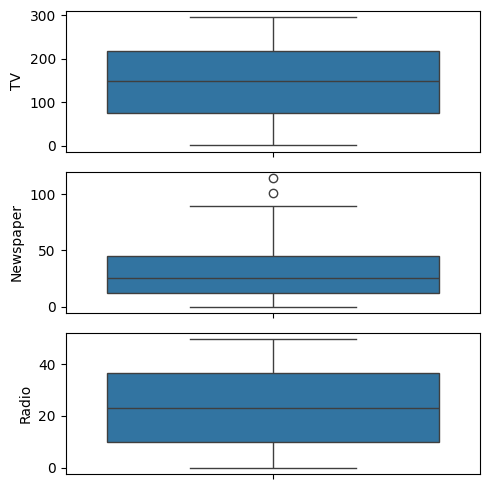

In [15]:
ads_data.isnull().sum()

fig, axes = plt.subplots(3, figsize=(5, 5))
sns.boxplot(ads_data['TV'], ax=axes[0])
sns.boxplot(ads_data['Newspaper'], ax=axes[1])
sns.boxplot(ads_data['Radio'], ax=axes[2])
plt.tight_layout()


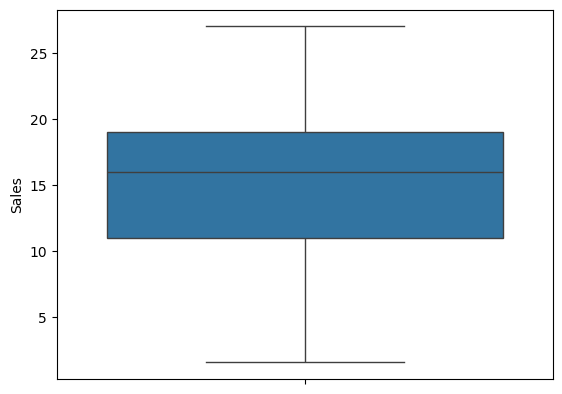

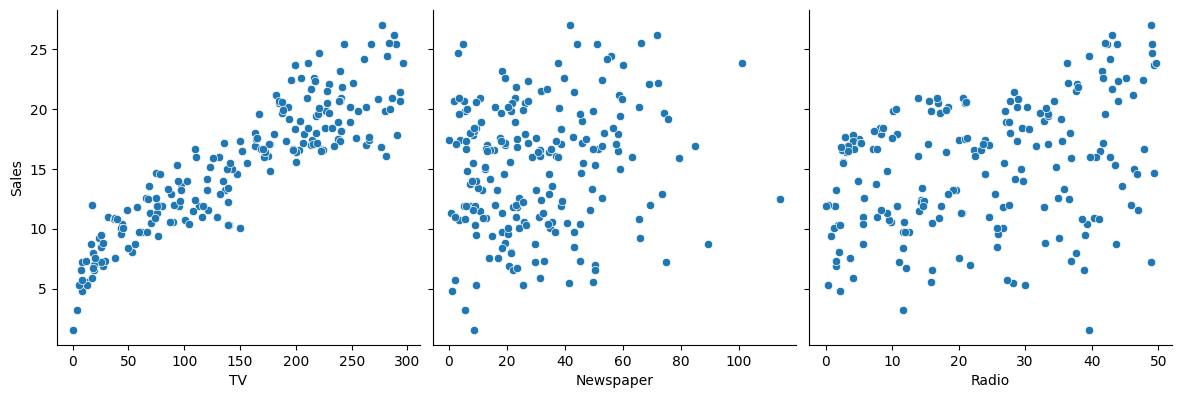

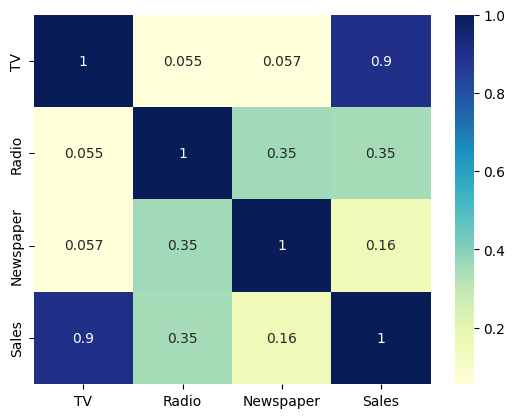

In [17]:
# Univariate Analysis of Sales
sns.boxplot(ads_data['Sales'])
plt.show()

# Scatter plot to see the relationship between Sales and other variables
sns.pairplot(ads_data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

# Correlation Heatmap
sns.heatmap(ads_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [18]:
feature_TV = ads_data['TV']
target_sales = ads_data['Sales']

In [20]:
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(feature_TV, target_sales, train_size=0.7, test_size=0.3, random_state=100)


In [22]:
# Add a constant to the training data
X_train_set_sm = sm.add_constant(X_train_set)

# Fit the regression line using OLS
linear_reg = sm.OLS(y_train_set, X_train_set_sm).fit()

# Print the parameters
linear_reg.params

const    6.948683
TV       0.054546
dtype: float64

In [23]:
# Summary of the model
print(linear_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           1.52e-52
Time:                        18:33:38   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

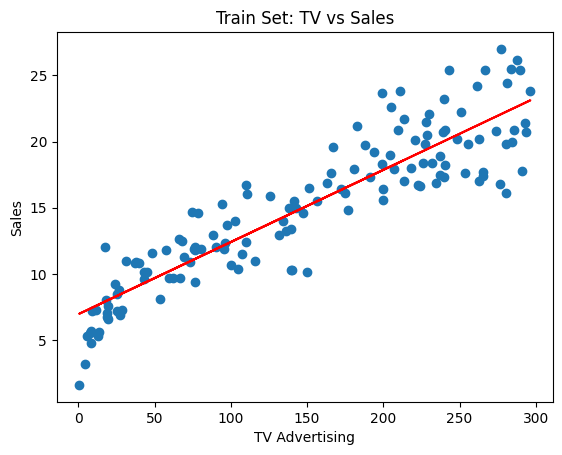

In [24]:
plt.scatter(X_train_set, y_train_set)
plt.plot(X_train_set, linear_reg.params[0] + linear_reg.params[1] * X_train_set, 'r')
plt.title('Train Set: TV vs Sales')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.show()

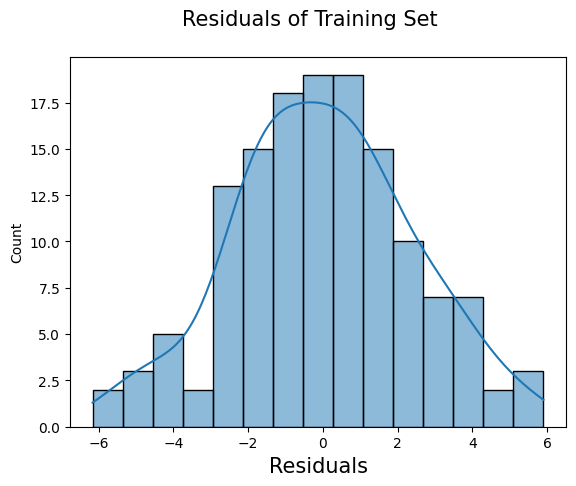

In [26]:
# Predicted values
y_train_pred_set = linear_reg.predict(X_train_set_sm)

# Residuals
train_residuals = y_train_set - y_train_pred_set

# Plot the distribution of residuals
fig = plt.figure()
sns.histplot(train_residuals, bins=15, kde=True)
fig.suptitle('Residuals of Training Set', fontsize=15)
plt.xlabel('Residuals', fontsize=15)
plt.show()



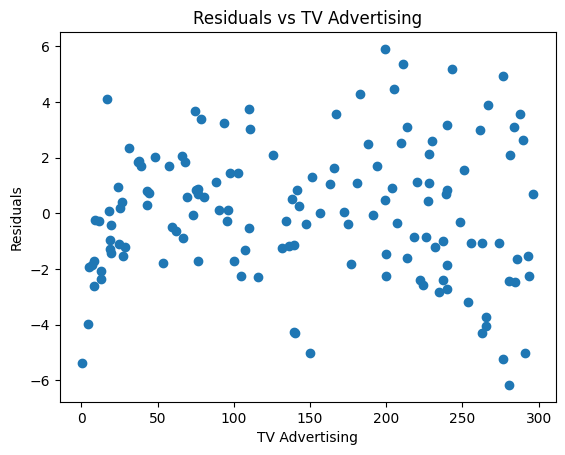

In [27]:
# Check for patterns in residuals
plt.scatter(X_train_set, train_residuals)
plt.title('Residuals vs TV Advertising')
plt.xlabel('TV Advertising')
plt.ylabel('Residuals')
plt.show()

In [28]:
# Add a constant to the test data
X_test_set_sm = sm.add_constant(X_test_set)

# Predict the y values corresponding to X_test_set_sm
y_test_predictions = linear_reg.predict(X_test_set_sm)

In [29]:
# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(y_test_set, y_test_predictions))
print(f'Root Mean Squared Error: {test_rmse}')

# Calculate R-squared
test_r_squared = r2_score(y_test_set, y_test_predictions)
print(f'R-squared: {test_r_squared}')


Root Mean Squared Error: 2.019296008966232
R-squared: 0.792103160124566


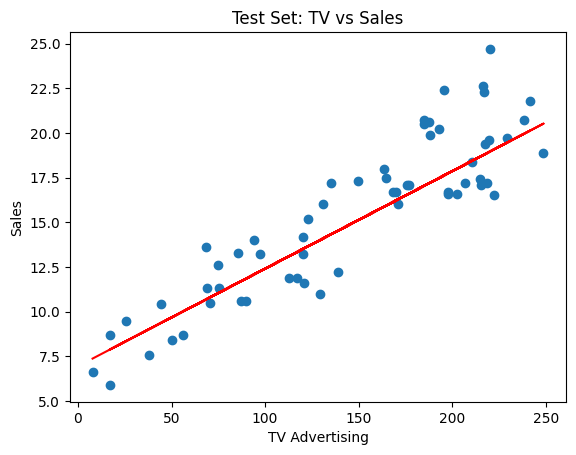

In [30]:
plt.scatter(X_test_set, y_test_set)
plt.plot(X_test_set, linear_reg.params[0] + linear_reg.params[1] * X_test_set, 'r')
plt.title('Test Set: TV vs Sales')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.show()